# AIRDOS Data Parser

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [3]:
fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,548))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,8,10,13,14,15,16,17,18,19,20,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Concatenate RMC and GGA lines to one table

In [4]:
df = df.reset_index(drop=True)
df1 = df.loc[df[0]=='$GPRMC']
df1 = df1.iloc[:,0:12]
df2 = df.iloc[df.loc[df[0]=='$GPRMC'].index+1]
df2 = df2.iloc[:,0:15]
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df5 = pd.concat([df1,df2], axis=1,  ignore_index=True)
# Convert NMEA time to pandas time
df5[9] = df5[9].astype(str)
df5[1] = df5[1].astype(str)
df5[1] = pd.to_datetime(df5[9]+df5[1], format='%d%m%y%H%M%S.%f',errors='coerce')#.dt.time
#df5=df5.rename(columns = {2:'time'})#
#df5 = df5.iloc[:,0:20]

df5.drop(df5[df5[24]!='M'].index, inplace=True)

df5[21] = pd.to_numeric(df5[21],errors='coerce')

df6 = pd.DataFrame()
df6['time']=df5[1]
df6['altitude'] = df5[21]
df6['Lat'] = df5[3]
df6['Lats'] = df5[4]
df6['Lon'] = df5[5]
df6['Lons'] = df5[6]
df6['time'] = pd.to_datetime(df6.time)
df6.set_index('time', inplace=True)
df6.dropna(axis=0,inplace=True)
df6 = df6[pd.notnull(df6.index)]
df6.to_csv('./data/ble.txt')
#df6.iloc[50:100]

## Calculate Flux

TypeError: Empty 'DataFrame': no numeric data to plot

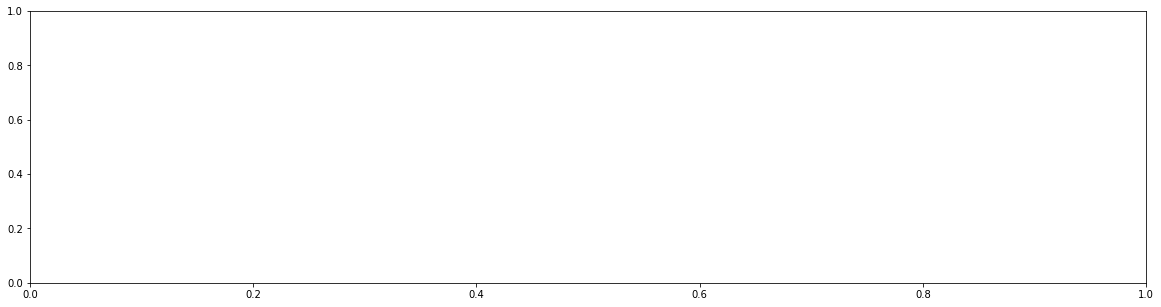

In [5]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('./data/ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(22,544)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[50775:51350,'sum'].plot()

#plt.ylim([0,20])
e1 = [50790,50900]
e2 = [50910,51020]
e3 = [51030,51140]
e4 = [51150,51300]

rc.ix[e1[0]:e1[1],'sum'].plot(c='b')
rc.ix[e2[0]:e2[1],'sum'].plot(c='orange')
rc.ix[e3[0]:e3[1],'sum'].plot(c='g')
rc.ix[e4[0]:e4[1],'sum'].plot(c='r')

plt.title('AIRDOS (HIMAC, He, 150 MeV, 2017-06)')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

print e1[1]

## Energy spectrum

In [6]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c='red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

ener1 = rc.ix[e1[0]:e1[1],22:520].sum()
ener2 = rc.ix[e2[0]:e2[1],22:520].sum()
ener3 = rc.ix[e3[0]:e3[1],22:520].sum()
ener4 = rc.ix[e4[0]:e4[1],22:520].sum()
 
plt.figure(figsize=(20,5))
#plt.yscale('log')

plt.plot(ener1, label='0 mm')
plt.plot(ener2, label='114.28 mm')
plt.plot(ener3, label='136.88 mm')
plt.plot(ener4, label='141.39 mm')
plt.ylim([0,500])
plt.legend()
plt.title('AIRDOS (measurement at HIMAC)')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,600,50))
plt.grid()


NameError: name 'e1' is not defined

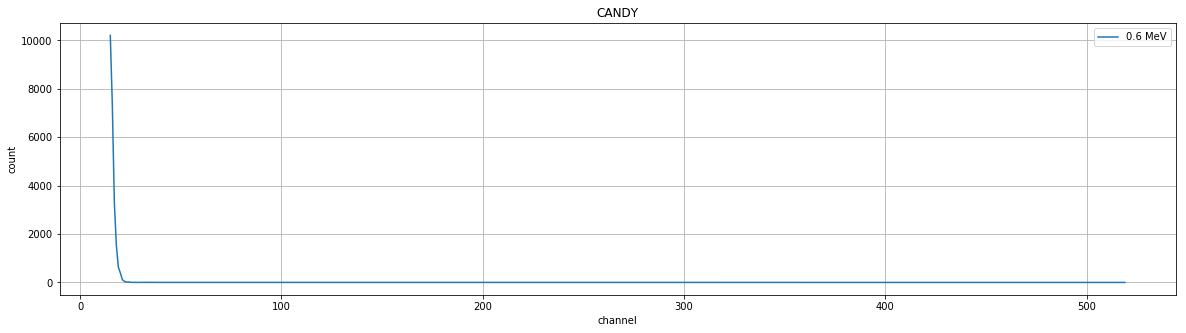

In [15]:
matplotlib.rcParams.update({'font.size': 10})

ener1 = rc.ix[0:350,15:520].sum()

plt.figure(figsize=(20,5))
plt.plot(ener1, label='0.6 MeV')
#plt.ylim([0,300])
#plt.xlim([0,100])
#plt.yscale('log')
plt.legend()
plt.title('CANDY')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(0,101,10))
#plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.grid()

Save histogram data to file.

In [6]:
ener1.to_csv('ener1.csv')
ener2.to_csv('ener2.csv')
ener3.to_csv('ener3.csv')
ener4.to_csv('ener4.csv')


In [33]:
%matplotlib qt
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv

def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))
fileName="ener1.csv"
accessMode="r"
with open(fileName,accessMode) as myCSVfile:
	data=list(csv.reader(myCSVfile))
	x,y=[],[]
	for i in data:
		x.append(int(i[0]))
		y.append(float(i[1]))

	plt.plot(x,y)
	points=plt.ginput(2)
	X1=int(round(points[0][0]))
	X2=int(round(points[1][0]))
	delta_x=abs(X2-X1)
	delta_y=float(y[X2])-float(y[X1])
	if y[X2]>y[X1]:
		a=delta_y/delta_x
		b=X1
	if y[X2]<y[X1]:
		a=-(delta_y/delta_x)
		b=X1
	spread=np.linspace(X1,X2,X2-X1+1)
	peak=y[X1:X2]-(a*spread[:-1]+b)
	amp=max(y[X1:X2])
	cen=y[X1]
	wid=float(y[X2])-float(y[X1])

	popt,pcov = curve_fit(gaussian, spread[:-1], peak, p0=[amp, cen, wid])

	plt.plot(spread[:-1],peak,'b+:', label='data'
	plt.plot(spread[:-1], gaussian(spread[:-1], *popt), 'r-', label='fit')
	plt.show()
	#<end examples/doc_model1.py>


SyntaxError: invalid syntax (<ipython-input-33-d885688742f7>, line 40)

## Plot Altitude

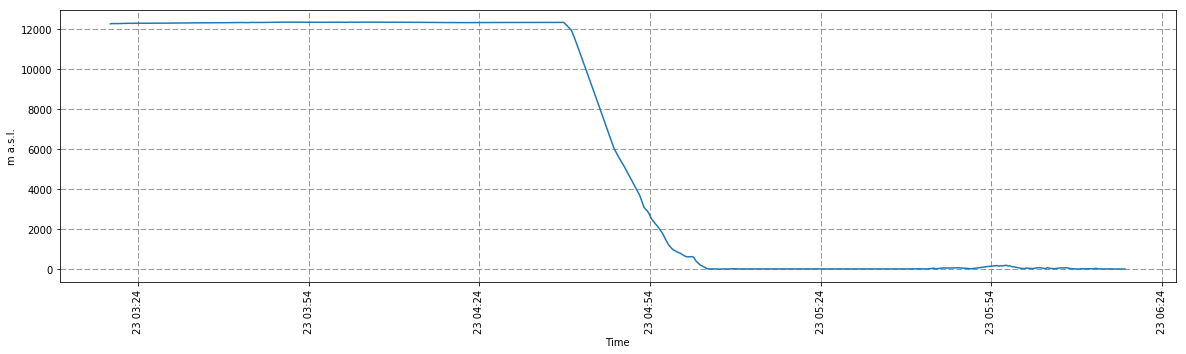

In [34]:
plt.figure(figsize=(20,5))

#df6.set_index('time').altitude.plot()
plt.plot(df6.index, df6.altitude)

plt.xticks(rotation='vertical')
#plt.gcf().autofmt_xdate()
#df5[:17000].plot(x=2,y='avgsnr',figsize=(12,5),xticks=['09:30:00','10:00:00','10:30:00','11:00:00','11:30:00','12:00:00','12:30:00','13:00:00','13:30:00','14:00:00'])
plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.xlabel('Time')
plt.ylabel('m a.s.l.')

## Convert Grades/Minutes to Grades

In [20]:
df6['Lat'] = df6['Lat'].astype(float)
df6['Lon'] = df6['Lon'].astype(float)

df6['Lats'] = df6['Lats'].str.replace('N','1')
df6['Lats'] = df6['Lats'].str.replace('S','-1')
df6['Lons'] = df6['Lons'].str.replace('E','1')
df6['Lons'] = df6['Lons'].str.replace('W','-1')

df6['LatDD'] = (df6.Lat/100).fillna(0).astype(int)
df6['LatDD'] = df6.LatDD + (df6.Lat - 100.0*df6.LatDD)/60.0
df6['LatDD'] = df6.LatDD * df6['Lats'].astype(float)  


df6['LonDD'] = (df6.Lon/100).fillna(0).astype(int)
df6['LonDD'] = df6.LonDD + (df6.Lon - 100.0*df6.LonDD)/60.0
df6['LonDD'] = df6.LonDD * df6['Lons'].astype(float)  

## Plot Map

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


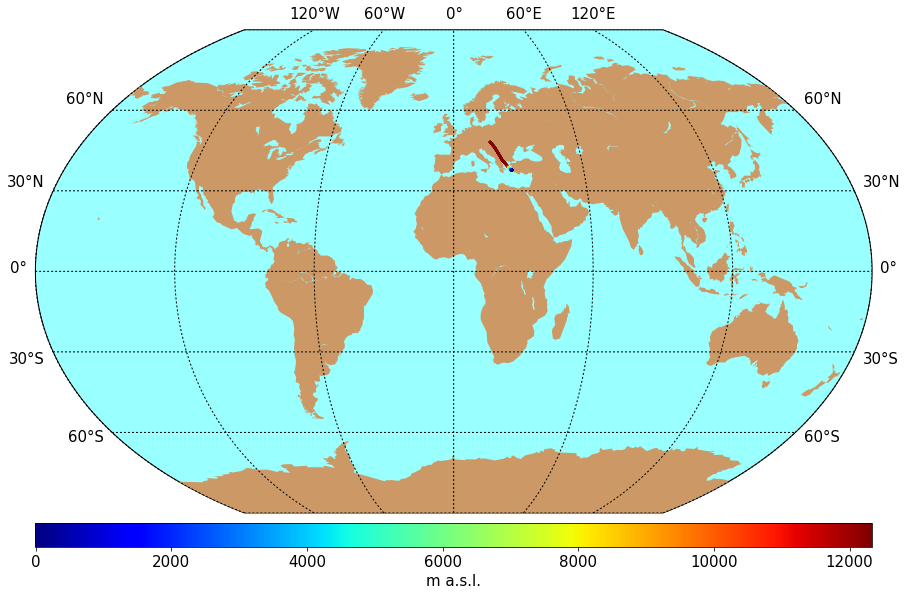

In [21]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

plt.figure(figsize=(15,15))
matplotlib.rcParams.update({'font.size': 15})


# draw map with markers for float locations
m = Basemap(projection='kav7',lon_0=0)
# create Basemap instance.
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')

x, y = m(df6.LonDD.tolist(),df6.LatDD.tolist())
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,1,0])
#m.scatter(df6.LonDD.tolist(),df6.LatDD.tolist(),3,marker='o',color='r')
im1 = m.scatter(x,y,c=df6.altitude.tolist(),s=7,marker='o',  linewidth='0', cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('m a.s.l.')
plt.show()

## Plot Flux

In [8]:

date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
altitude = np.nan
LatDD = np.nan
LonDD = np.nan
for i,r in df.iterrows():
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
    '''
        Lat = float(r[3])
        Lon = float(r[5])

        if (r[4] == 'N'):
            Lats = 1
        else:
            Lats = -1

        if (r[6] == 'E'):
            Lons = 1
        else:
            Lons = -1

        LatDD = int(Lat/100)
        LatDD = LatDD + (Lat - 100.0*LatDD)/60.0
        LatDD = LatDD * Lats  

        LonDD = int(Lon/100)
        LonDD = LonDD + (Lon - 100.0*LonDD)/60.0
        LonDD = LonDD * Lons  
    '''       
    if (r[0] == '$GPGGA'):
        altitude = r[9]
    #r[20] = date
    df.set_value(i,'date',date)
    df.set_value(i,'alt',altitude)
    #df.set_value(i,22,LatDD)
    #df.set_value(i,23,LonDD)

#df.to_csv('./data/complete.csv')

In [9]:
#dfo = df[[25,26,27]].reset_index().groupby(20).sum()
#df.reset_index(inplace=True)
dfo = df
#dfo.reset_index(inplace=True)
dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)

#dfo = dfo[range(20,544)].groupby(20).sum()
#dfo

#df.iloc[20:40,0:30]
#dfo['sum'] = dfo[range(27,544)].sum(axis=1)

dfo.to_csv('./data/radiation.csv')

In [10]:
plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

dfo = pd.read_table('./data/radiation.csv', sep=',', header=0)
dfo = dfo.dropna(how='any')

break

dfo['20'] = pd.to_datetime(dfo['20'])
dfo = dfo.set_index(['20'])
NOISE_LEVEL=22
dfo[range(NOISE_LEVEL,500)] = dfo[range(NOISE_LEVEL,500)].mul(range(1,500+1-NOISE_LEVEL),axis=1)
dfo['rad'] = dfo[range(NOISE_LEVEL,500)].sum(axis=1)
xx = dfo.loc['2017-06-23 01:00:00':'2017-06-23 12:00:00']
#xx = dfo
#xx = dfo
#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)

xx['rad'].plot(c='r', label='Doserate (rolling mean '+str(WINDOW)+')')
plt.xlabel('UT')
plt.ylabel('Effective Doserate in Silicon [arbitrary unit]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.ylim(0,150)
plt.legend(loc=2)

ax = plt.twinx()
xx['21'].plot(c='b',label='alt')
plt.plot(xx['18']*100,c='tan',label='noise',zorder=10)
plt.ylim(0,13000)
#plt.plot(xx[19]*5000-xx['18']*100,c='green',label='corr')
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('CANDY 2017 - Flight from Japan')


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,5,7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SyntaxError: 'break' outside loop (<ipython-input-10-c1610a16576b>, line 7)

In [52]:
dfo

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,540,541,542,543,544,545,546,547,date,alt
0,3,$CANDY,8,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:19:09,12248.0
1,8,$CANDY,9,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:19:25,12258.6
2,13,$CANDY,10,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:19:41,12257.9
3,18,$CANDY,11,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-06-23 03:19:57,12256.9
4,23,$CANDY,12,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:20:13,12259.0
5,28,$CANDY,13,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:20:29,12258.7
6,32,$CANDY,14,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:20:45,12260.7
7,36,$CANDY,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:21:01,12264.3
8,41,$CANDY,16,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:21:17,12267.0
9,46,$CANDY,17,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2017-06-23 03:21:33,12268.3


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,5,7,10,13,550) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


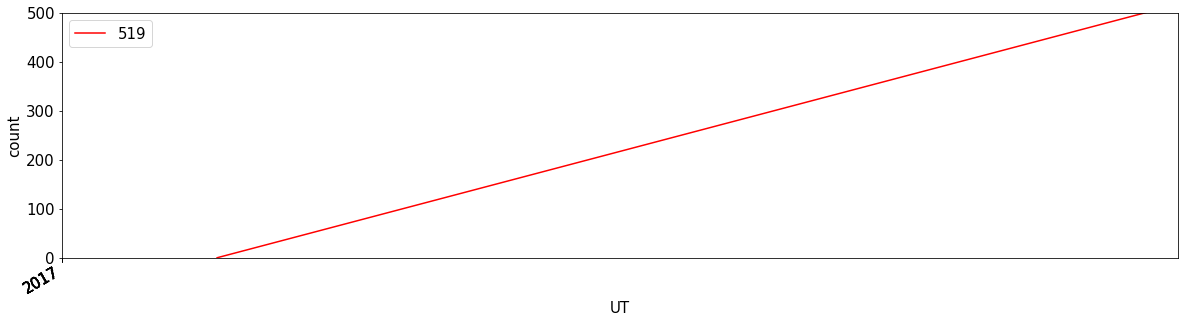

In [11]:
dfo = pd.read_table('./data/radiation.csv', sep=',', header=None)

#plt.figure(figsize=(10,5))

dfo[0] = pd.to_datetime(dfo[0])

dfo = dfo.set_index([0])

#xx = dfo.loc['2017-03-26 00:00:00':'2017-03-30 00:00:00']
xx = dfo

xx.plot(y=519, c='r', xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
#plt.plot(dfo[0], dfo[519], c='r')

#plt.xticks(rotation='vertical')
#plt.gcf().autofmt_xdate()
plt.ylim([0,500])
plt.ylabel('count')
plt.xlabel('UT')

## Calculate Flux

In [12]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('./data/ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(25,544)].sum(axis=1)
#rc['sum']

In [13]:
#df.iloc[20:40,0:30]
#df = df.set_index([20])
xx = df.loc['2017-03-28 14:26:39':'2017-03-28 20:26:42',0:24]

xx.loc[xx[0]=='$GPRMC']

TypeError: cannot do slice indexing on <class 'pandas.indexes.base.Index'> with these indexers [0] of <type 'int'>

TypeError: Empty 'DataFrame': no numeric data to plot

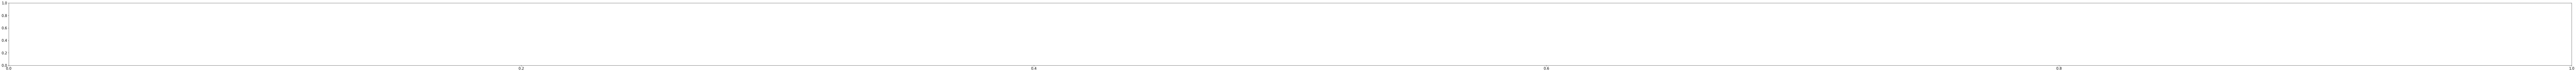

In [14]:
#df.loc[20:100,27:46]
#rc.loc[20:100,27:46]
plt.figure(figsize=(200,5))

rc.loc[250000:,547].plot()
plt.ylim([0,10])
plt.title('AIRDOS - Flux above 1 MeV')
plt.xlabel('measurement No.')
plt.ylabel('Flux')


## Telemetry from FlightStats

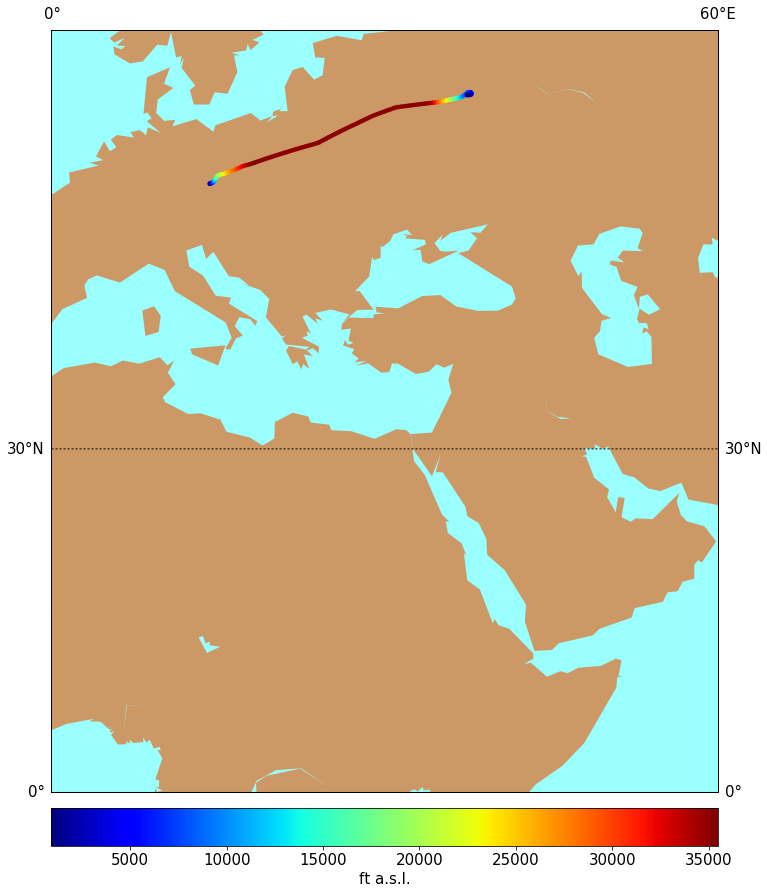

In [4]:
# http://www.flightstats.com/go/FlightTracker/flightTracker.do
df = pd.read_table('./data/telemetry.csv', sep=',', header=0,thousands=',')

import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

plt.figure(figsize=(15,15))
matplotlib.rcParams.update({'font.size': 15})


# draw map with markers for float locations
#m = Basemap(projection='kav7',lon_0=0)
# create Basemap instance.
m = Basemap(llcrnrlon=-0,llcrnrlat=0,urcrnrlon=60,urcrnrlat=60,projection='mill')

x, y = m(df.Longitude.tolist(),df.Latitude.tolist())
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,1,0])

# Parse altitude and emove commas from thausands
df.Alt = df.Altitude.str.split(' ').str[0]
df.Alt = pd.to_numeric(df.Alt.str.replace(',',''), errors='coerce')

im1 = m.scatter(x,y,c=df.Alt.tolist(),s=7,marker='o',  linewidth='2', cmap='jet')
#im1 = m.scatter(x,y,s=7,marker='o',  linewidth='2', cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('ft a.s.l.')
plt.show()